In [98]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False
pd.reset_option('display.float_format')
df = pd.read_excel('设备台帐信息2022.11.08.xls')
df.columns

Index(['Unnamed: 0', '设备编号', '资产编号', '设备名称', '设备型号', '设备规格', '制造厂', '出厂年月',
       '使用部门', '安装地点', '立卡年月', '启用年月', 'ABC分类', '财务分类', '原值(元)', '完好状态',
       '当前管理状态', '状态变动日期', '使用年限(年)', '供货商', '出厂编号', '单价(元)', '设备属性', '生产用途',
       '责任人', '备注'],
      dtype='object')

In [55]:
cond1 = df['使用部门'] == '赤壁子公司'
df1 = df[cond1]
a = df1.groupby('设备名称')['设备名称'].count()
df1.groupby('设备名称')['设备名称'].count()


设备名称
CO2/MAG焊机       2
CO2/MAG自动焊机     4
CO2供气充装系统       1
CO2半自动焊机       30
CO2气体保护焊        5
               ..
高温高压清洗机         3
高精度工具磨床         1
高速精密车床          1
龙门刨床            1
龙门式抛光机          1
Name: 设备名称, Length: 337, dtype: int64

In [ ]:
df1['设备名称'].unique().size
num = a.size
sta = pd.DataFrame(a)
sta1 = sta.iloc[0:100,:]
sta1
sta1.plot(kind='bar',figsize =(20,10))
# a2 = a.iloc[int(a.size/3):int(a.size/3)*2,:]
# a3 = a.iloc[int(a.size/3*2):,:]
# a.plot(kind='bar',figsize =(20,2))


In [ ]:
getSeri = df.groupby('使用部门')['设备名称'].count()
Seri_to_df = pd.DataFrame(getSeri)
Seri_to_df.plot(kind='bar')

In [77]:
df1['生产用途'].value_counts()


生产     990
非生产    372
Name: 生产用途, dtype: int64

<AxesSubplot:xlabel='使用部门'>

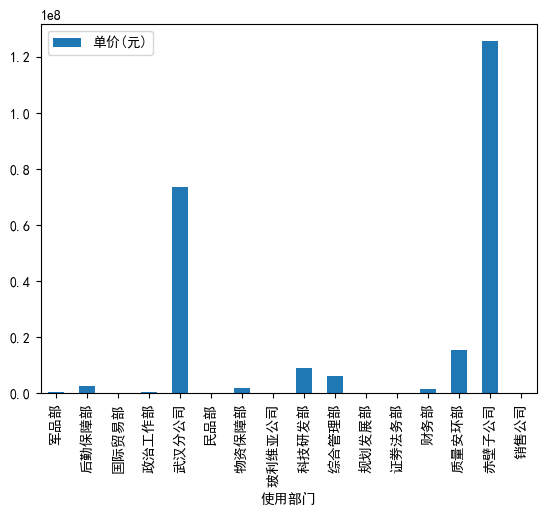

In [109]:
getSeri1 = df.groupby('使用部门')['单价(元)'].sum()
Seri_to_df1 = pd.DataFrame(getSeri1)
Seri_to_df1.plot(kind='bar')

In [111]:
import re
def pdFloatFormat(x):
    li1=re.split('E+', str(x),flags=re.IGNORECASE)
    li2=re.split('E-', str(x),flags=re.IGNORECASE)
    if len(li1)>1 or len(li2)>1:        
        if len(li1)>1:            
            n1=len(li1[0].replace('.',''))-1
            n2=int(li1[1])
            nx=n2-n1
            n=0 if nx>0 else nx
        else:
            n1=len(li2[0].replace('.',''))-1   
            n2=int(li2[1])
            n=n1+n2
        print(x,n)
        x2=('{:.'+str(n)+'f}').format(x)
    else:
        x2=str(x)
    return x2
pd.options.display.float_format=pdFloatFormat

In [124]:
import numpy as np
np.set_printoptions(formatter={'all': lambda x: str(x)})
np.set_printoptions(suppress=True)

In [130]:
pd.options.display.float_format=pdFloatFormat
getSeri2 = df.groupby('使用部门')['单价(元)'].sum()
Seri_to_df2 = pd.DataFrame(getSeri2)


Seri_to_df2.index

Index(['军品部', '后勤保障部', '国际贸易部', '政治工作部', '武汉分公司', '民品部', '物资保障部', '玻利维亚公司',
       '科技研发部', '综合管理部', '规划发展部', '证劵法务部', '财务部', '质量安环部', '赤壁子公司', '销售公司'],
      dtype='object', name='使用部门')

In [ ]:
x_values = []
y_value = Seri_to_df2.index

plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.scatter(x_values, y_value, c=y_value, cmap=plt.cm.Reds, s=20)
ax.ticklabel_format(style='plain')